In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = []

for year in range(2012,2022):
    from_csv = pd.read_csv(f'./data_mb_all_years/{year}.csv')
    df = pd.DataFrame()
    
    # Var names are inconsistent
    nefashot = 'nefashot' if 'nefashot' in from_csv.columns else 'Nefashot'
    mispar_mb = 'misparmb' if 'misparmb' in from_csv.columns else 'MisparMb'
    net = 'net' if 'net' in from_csv.columns else 'Net'
    decile = 'decile' if 'decile' in from_csv.columns else 'Decile'
    
    
    df['decile'] = from_csv[decile] # עשירון    
    df['year'] = year # שנת חקירה
    df['nefashot'] = from_csv[nefashot] # נפשות במשק
    df['neto'] = from_csv[net] # הכנסה כוללת נטו
    df['food_no_fv'] = from_csv['c30'] # הוצאה על אוכל ללא פירות וירקות
    df['fruits_vegtables'] = from_csv['c31'] # הוצאה על פירות וירקות
    df['total_food'] = df['food_no_fv'] + df['fruits_vegtables'] # הוצאה על כל האוכל
    df['housing'] = from_csv['c32'] # הוצאה על דיור
    
    data.append(df)

In [12]:
big_df = pd.concat(data)
big_df

,decile,year,nefashot,neto,food_no_fv,fruits_vegtables,total_food,housing
0,3,2012,3,8873,2235.0,533.0,2768.0,1366.0
1,4,2012,1,5111,88.0,714.0,802.0,3035.0
2,7,2012,2,11069,1024.0,797.0,1821.0,2869.0
3,1,2012,2,2198,876.0,240.0,1116.0,202.0
4,1,2012,3,3979,906.0,243.0,1149.0,1894.0
...,...,...,...,...,...,...,...,...
6052,10,2021,6,55567,12599.0,272.0,12871.0,6257.0
6053,1,2021,7,10443,2164.0,34.0,2198.0,3955.0
6054,1,2021,3,4221,2191.0,388.0,2579.0,2005.0
6055,3,2021,3,6854,966.0,316.0,1282.0,5228.0


In [13]:
food_income_df = big_df.copy()
food_income_df['food_as_per_income'] = (food_income_df['total_food'] / food_income_df['neto']) * 100 # הוצאה על אוכל כאחוז מהכנסה
# remove outliers / bad data
food_income_df = food_income_df[(food_income_df['food_as_per_income'] > 0) & (food_income_df['food_as_per_income'] < 100)]
food_income_df

,decile,year,nefashot,neto,food_no_fv,fruits_vegtables,total_food,housing,food_as_per_income
0,3,2012,3,8873,2235.0,533.0,2768.0,1366.0,31.195762
1,4,2012,1,5111,88.0,714.0,802.0,3035.0,15.691645
2,7,2012,2,11069,1024.0,797.0,1821.0,2869.0,16.451351
3,1,2012,2,2198,876.0,240.0,1116.0,202.0,50.773430
4,1,2012,3,3979,906.0,243.0,1149.0,1894.0,28.876602
...,...,...,...,...,...,...,...,...,...
6052,10,2021,6,55567,12599.0,272.0,12871.0,6257.0,23.163028
6053,1,2021,7,10443,2164.0,34.0,2198.0,3955.0,21.047592
6054,1,2021,3,4221,2191.0,388.0,2579.0,2005.0,61.099266
6055,3,2021,3,6854,966.0,316.0,1282.0,5228.0,18.704406


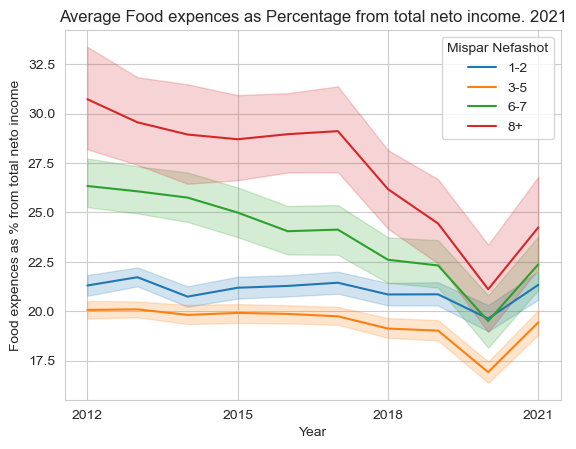

In [16]:
# Create bins for 'nefashot' ranges
bins = [0, 2.5, 5.5, 7.5, float('inf')]

# Create labels for the bins
labels = ['1-2', '3-5', '6-7', '8+']

# Add a new column to the DataFrame with the 'nefashot' ranges
food_income_df.loc[:, 'nefashot_group'] = pd.cut(food_income_df['nefashot'], bins=bins, labels=labels)

sns.set_style('whitegrid')
ax = sns.lineplot(x="year", y="food_as_per_income", hue='nefashot_group', data=food_income_df)

# Set the custom legend
ax.legend(title='Mispar Nefashot', loc='upper left')

custom_ticks = [2012, 2015, 2018, 2021]
plt.xticks(custom_ticks)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Food expences as % from total neto income')
ax.set_title('Average Food expences as Percentage from total neto income. 2021')

# Set legend
ax.legend(title='Mispar Nefashot', loc='upper right')

# Show the plot
plt.show()

In [7]:
veg_df = big_df.copy()
veg_df['fv_as_per_food'] = (veg_df['fruits_vegtables'] / veg_df['total_food']) * 100 # הוצאה על פירות וירקות כאחוז מהאוכל
veg_df = veg_df[veg_df['fv_as_per_food'] > 0]
veg_df.sort_values('fv_as_per_food')

,decile,year,nefashot,neto,food_no_fv,fruits_vegtables,total_food,housing,fv_as_per_food
3690,6,2015,1,7884,4303.0,1.0,4304.0,757.0,0.023234
1174,8,2018,5,33015,6654.0,5.0,6659.0,4230.0,0.075086
7723,1,2018,2,527,1324.0,1.0,1325.0,2535.0,0.075472
3997,6,2013,3,13780,5465.0,5.0,5470.0,2490.0,0.091408
6315,4,2016,6,16932,990.0,1.0,991.0,4144.0,0.100908
...,...,...,...,...,...,...,...,...,...
1758,8,2017,5,38139,0.0,254.0,254.0,7363.0,100.000000
3944,2,2021,1,3976,0.0,128.0,128.0,1983.0,100.000000
8680,8,2017,1,8446,0.0,366.0,366.0,4340.0,100.000000
7300,6,2018,1,7316,0.0,58.0,58.0,2535.0,100.000000


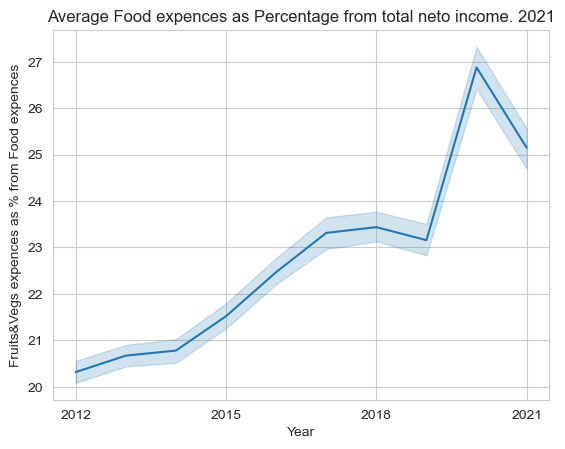

In [17]:
sns.set_style('whitegrid')
ax = sns.lineplot(x="year", y="fv_as_per_food", data=veg_df)

custom_ticks = [2012, 2015, 2018, 2021]
plt.xticks(custom_ticks)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Fruits&Veg expences as % from Food expences')
ax.set_title('Fruits&Veg expences as  from total neto income. 2021')

# Show the plot
plt.show()

In [9]:
housing_df = big_df.copy()
housing_df['housing_as_per_income'] = (housing_df['housing'] / housing_df['neto']) * 100 # הוצאה על דיור כאחוז מהכנסה
housing_df = housing_df[(housing_df['housing_as_per_income'] >= 0) & (housing_df['housing_as_per_income'] <= 100)]
housing_df.sort_values('housing_as_per_income')

,decile,year,nefashot,neto,food_no_fv,fruits_vegtables,total_food,housing,housing_as_per_income
4636,1,2020,1,1872,0.0,0.0,0.0,0.0,0.000000
3083,1,2018,5,8117,667.0,30.0,697.0,0.0,0.000000
3029,1,2021,3,4423,0.0,0.0,0.0,0.0,0.000000
5452,5,2017,3,15677,324.0,38.0,362.0,0.0,0.000000
8672,1,2013,1,2233,38.0,0.0,38.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
3418,5,2014,1,3461,192.0,0.0,192.0,3458.0,99.913320
1380,2,2020,1,3505,615.0,393.0,1008.0,3502.0,99.914408
8235,6,2012,1,3962,1734.0,847.0,2581.0,3959.0,99.924281
4208,2,2016,2,3238,421.0,186.0,607.0,3236.0,99.938233


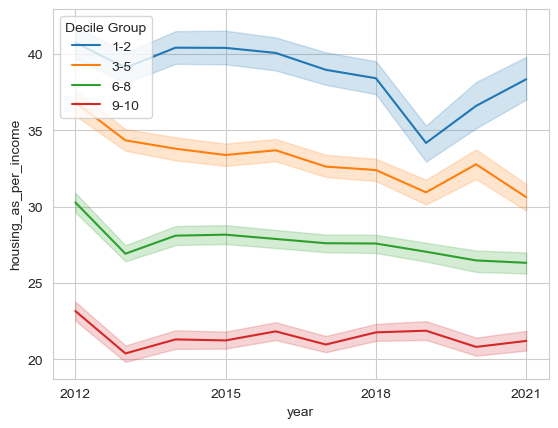

In [10]:
# Create bins for 'nefashot' ranges
bins = [0, 2.5, 5.5, 8.5, 10.5]

# Create labels for the bins
labels = ['1-2', '3-5', '6-8', '9-10']

# Add a new column to the DataFrame with the 'nefashot' ranges
housing_df.loc[:, 'decile_group'] = pd.cut(housing_df['decile'], bins=bins, labels=labels)

sns.set_style('whitegrid')
ax = sns.lineplot(x="year", y="housing_as_per_income", hue='decile_group', data=housing_df)

# Set the custom legend
ax.legend(title='Decile Group', loc='upper left')

custom_ticks = [2012, 2015, 2018, 2021]
plt.xticks(custom_ticks)

# Show the plot
plt.show()